## Simple linear regression

In [81]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [82]:
df = pd.read_csv('/kaggle/input/homeprices/homeprices.csv')
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


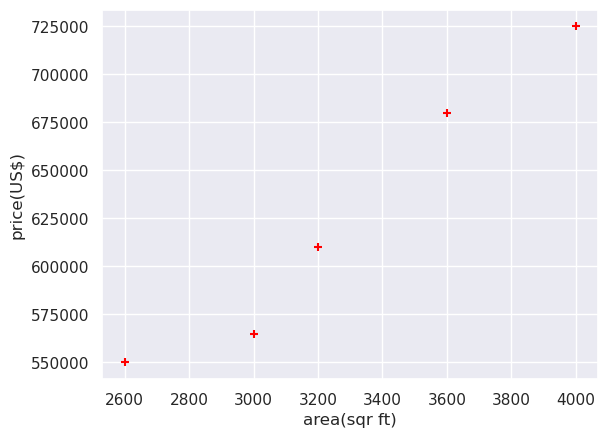

In [83]:
%matplotlib inline
plt.xlabel('area(sqr ft)')
plt.ylabel('price(US$)')
plt.scatter(df.area,df.price,color='red',marker='+')

In [84]:
reg = linear_model.LinearRegression()
reg.fit(df[['area']],df.price)

LinearRegression()

In [85]:
reg.predict([[3300]])

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([628715.75342466])

In [86]:
reg.coef_ # slope

array([135.78767123])

In [87]:
reg.intercept_ # จุดตัดแกน Y

180616.43835616432

### Y = m * X + b

In [88]:
135.78767123 * 3300 + 180616.43835616432

628715.7534151643

In [89]:
area_df = pd.read_csv("/kaggle/input/home-prices-example-1/areas.csv")
area_df

,area
0,1000
1,1500
2,2300
3,3540
4,4120
5,4560
6,5490
7,3460
8,4750
9,2300


In [90]:
p = reg.predict(area_df)
p

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [91]:
area_df['prices']= p
area_df 

,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


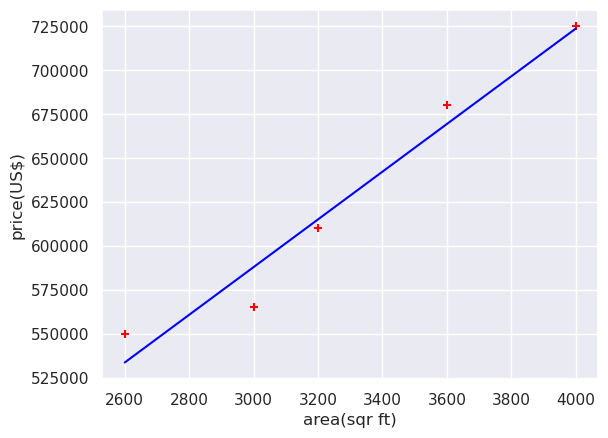

In [92]:
%matplotlib inline
plt.xlabel('area(sqr ft)')
plt.ylabel('price(US$)')
plt.scatter(df.area,df.price,color='red',marker='+')
plt.plot(df.area,reg.predict(df[['area']]),color = 'blue')

# อธิบายจุดตัด 3200 , 60000


#### Save Model To a File Using Python Pickle


In [93]:
import pickle

In [94]:
with open('model_pickle','wb') as file:
    pickle.dump(reg,file)

#### Load Saved Model

In [95]:
with open('model_pickle','rb') as file:
    mp = pickle.load(file)

In [96]:
mp.coef_

array([135.78767123])

In [97]:
mp.intercept_

180616.43835616432

In [98]:
mp.predict([[5000]])

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([859554.79452055])

#### Save Trained Model Using joblib


In [99]:
#from sklearn.externals import joblib

In [100]:
#joblib.dump(model, 'model_joblib')

#### Load Saved Model

In [101]:
#mj = joblib.load('model_joblib')

In [102]:
#mj.coef_

In [103]:
#mj.intercept_

In [104]:
#mj.predict([[5000]])

## Multiple linear regression

In [105]:
df = pd.read_csv('/kaggle/input/homepricesmultiplevariables/homeprices.csv')
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [106]:
import math
median_bedrooms = math.floor(df.bedrooms.mean())
median_bedrooms
round(df.bedrooms.mean(),2)
#print(df.bedrooms.mean())

4.2

In [107]:
df.bedrooms = df.bedrooms.fillna(median_bedrooms)
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


#### y = m1x1 + m2x2 + m3x3 + b

In [108]:
reg = linear_model.LinearRegression()
reg.fit(df[['area','bedrooms','age']],df.price)

LinearRegression()

In [109]:
reg1 = linear_model.LinearRegression(positive = True)
reg1.fit(df[['area','bedrooms','age']],df.price)

LinearRegression(positive=True)

In [110]:
reg1.coef_

array([   89.63335496, 51967.8780013 ,     0.        ])

In [111]:
reg.coef_ #m

array([  112.06244194, 23388.88007794, -3231.71790863])

In [112]:
reg.intercept_ #b

221323.00186540384

In [113]:
reg.predict([[3000, 3, 40]]) # พื้นที่บ้าน 3000, 3 ห้องนอน, อายุ 40 ปี

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([498408.25158031])

In [114]:
reg1.predict([[3000, 3, 40]])

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([550356.91109669])

#### y = m1x1 + m2x2 + m3x3 + b

In [115]:
112.06244194 * 3000 + 23388.88007794 * 3  -3231.71790863 * 40 + 221323.00186540384

498408.25157402386

In [116]:
reg.predict([[2500, 4, 5]]) # พื้นที่บ้าน 2500, 4 ห้องนอน, อายุ 5 ปี

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([578876.03748933])

## Polynomial  regression

In [117]:
import pandas as pd

data = pd.DataFrame([[1, 3],
                    [5, 5],
                    [5, 10],
                    [10, 12],
                    [14, 16],
                    [17, 15],
                    [21, 7],
                    [24, 4],
                    [25, 1]])
data

,0,1
0,1,3
1,5,5
2,5,10
3,10,12
4,14,16
5,17,15
6,21,7
7,24,4
8,25,1


In [118]:
data.columns = ['x', 'y']
data

,x,y
0,1,3
1,5,5
2,5,10
3,10,12
4,14,16
5,17,15
6,21,7
7,24,4
8,25,1


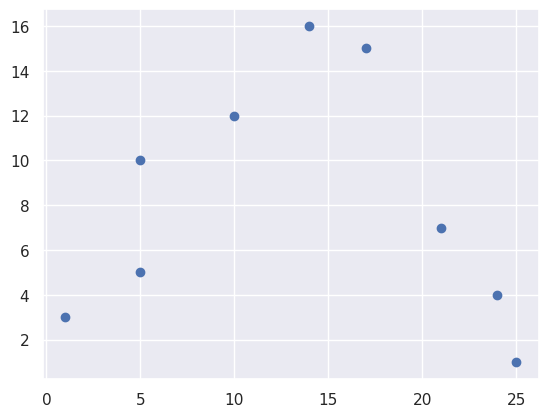

In [119]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(x=data['x'], y=data['y'])

In [120]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [121]:
x = np.array(data['x'])
y = np.array(data['y'])

#### สร้าง model

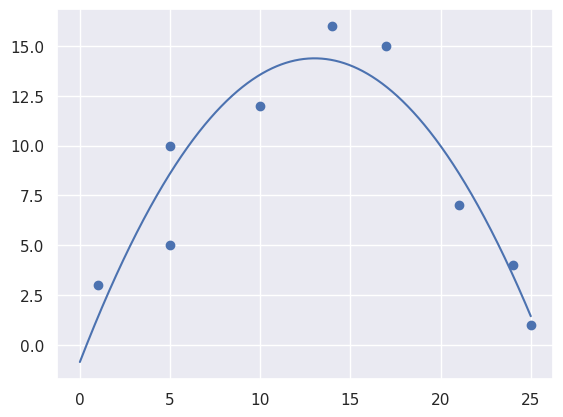

In [122]:
model = make_pipeline(PolynomialFeatures(degree =2), #สมการมีถึงยกกำลัง 2
                     LinearRegression())

model.fit(x[:, np.newaxis], y) # แปลงข้อมูลจาก 1 มิติ เป็น 2 มิติ
xfit = np.linspace(0, 25, 1000) # เตรียม data ที่ใช้ในการ test
yfit = model.predict(xfit[:, np.newaxis]) # เตรียม data สำหรับเก็บผลการทำนายที่สัมพันธ์กับ xfit
plt.scatter(x, y)  
plt.plot(xfit, yfit)

In [123]:
r_square = model.score(x[:, np.newaxis], y)
print(f'coefficient of determination: {r_square}')

coefficient of determination: 0.8703404241526076


In [124]:
degrees = range(1, 10)
mse = []
for i in degrees:
    poly = PolynomialFeatures(i)
    x_poly = poly.fit_transform(x[:, np.newaxis])
    model = LinearRegression()
    model.fit(x_poly, y)
    y_pred = model.predict(x_poly)
    mse.append(np.mean((y - y_pred)**2))

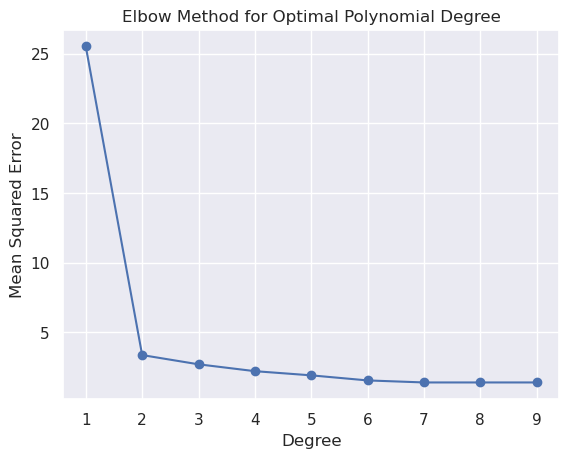

In [125]:
plt.plot(degrees, mse, '-o')
plt.xlabel('Degree')
plt.ylabel('Mean Squared Error')
plt.title('Elbow Method for Optimal Polynomial Degree')
plt.xticks(degrees)
plt.show()

In [126]:
optimal_degree = 1
for i in range(len(mse)-1):
    if abs(mse[i+1] - mse[i]) < 0.1:
        optimal_degree = i+2
        break
print(f"Optimal degree found using elbow method: {optimal_degree}")

Optimal degree found using elbow method: 8


## Dummy Variable

In [127]:
df = pd.read_csv('/kaggle/input/homeprices-one-hot-encoding/homeprices.csv')
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


#### Using pandas to create dummy variables


In [128]:
dummies = pd.get_dummies(df.town)
dummies

,monroe township,robinsville,west windsor
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,1,0


In [129]:
merged = pd.concat([df,dummies],axis = 'columns')
merged

,town,area,price,monroe township,robinsville,west windsor
0,monroe township,2600,550000,1,0,0
1,monroe township,3000,565000,1,0,0
2,monroe township,3200,610000,1,0,0
3,monroe township,3600,680000,1,0,0
4,monroe township,4000,725000,1,0,0
5,west windsor,2600,585000,0,0,1
6,west windsor,2800,615000,0,0,1
7,west windsor,3300,650000,0,0,1
8,west windsor,3600,710000,0,0,1
9,robinsville,2600,575000,0,1,0


In [130]:
final = merged.drop(['town'], axis = 'columns')
final

,area,price,monroe township,robinsville,west windsor
0,2600,550000,1,0,0
1,3000,565000,1,0,0
2,3200,610000,1,0,0
3,3600,680000,1,0,0
4,4000,725000,1,0,0
5,2600,585000,0,0,1
6,2800,615000,0,0,1
7,3300,650000,0,0,1
8,3600,710000,0,0,1
9,2600,575000,0,1,0


#### Dummy Variable Trap
ลบตัวแปร Dummy 1ตัว เพราะ multi-co-linear

In [131]:
final = final.drop(['west windsor'], axis = 'columns')
final

,area,price,monroe township,robinsville
0,2600,550000,1,0
1,3000,565000,1,0
2,3200,610000,1,0
3,3600,680000,1,0
4,4000,725000,1,0
5,2600,585000,0,0
6,2800,615000,0,0
7,3300,650000,0,0
8,3600,710000,0,0
9,2600,575000,0,1


In [132]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [133]:
X = final.drop('price', axis = 'columns')
X

,area,monroe township,robinsville
0,2600,1,0
1,3000,1,0
2,3200,1,0
3,3600,1,0
4,4000,1,0
5,2600,0,0
6,2800,0,0
7,3300,0,0
8,3600,0,0
9,2600,0,1


In [134]:
y = final.price
y

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

In [135]:
model.fit(X,y)

LinearRegression()

In [136]:
model.predict([[2685,0,1]]) #area = 2685, towm = robinsville

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([576182.43388519])

In [137]:
model.predict([[3100,0,0]]) #west windsor

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([643172.43603526])

In [138]:
model.score(X,y)

0.9573929037221872

### One hot encoder

In [139]:
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [140]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [141]:
dfle = df
dfle.town = le.fit_transform(dfle.town)
dfle

,town,area,price
0,0,2600,550000
1,0,3000,565000
2,0,3200,610000
3,0,3600,680000
4,0,4000,725000
5,2,2600,585000
6,2,2800,615000
7,2,3300,650000
8,2,3600,710000
9,1,2600,575000


In [142]:
X = dfle[['town','area']].values #ทำให้เป็น array 2 d
X 

array([[   0, 2600],
       [   0, 3000],
       [   0, 3200],
       [   0, 3600],
       [   0, 4000],
       [   2, 2600],
       [   2, 2800],
       [   2, 3300],
       [   2, 3600],
       [   1, 2600],
       [   1, 2900],
       [   1, 3100],
       [   1, 3600]])

In [143]:
y = dfle.price.values
y

array([550000, 565000, 610000, 680000, 725000, 585000, 615000, 650000,
       710000, 575000, 600000, 620000, 695000])

In [144]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('town', OneHotEncoder(), [0])], remainder = 'passthrough')

In [145]:
X = ct.fit_transform(X)
X

array([[1.0e+00, 0.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.0e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.2e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.9e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.1e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.6e+03]])

In [146]:
X = X[:,1:] # drop column 1
X

array([[0.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 3.0e+03],
       [0.0e+00, 0.0e+00, 3.2e+03],
       [0.0e+00, 0.0e+00, 3.6e+03],
       [0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 1.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 2.9e+03],
       [1.0e+00, 0.0e+00, 3.1e+03],
       [1.0e+00, 0.0e+00, 3.6e+03]])

In [147]:
model.fit(X,y)

LinearRegression()

In [148]:
model.predict([[0,0,3300]]) # monroe township

array([628537.94882821])

In [149]:
model.predict([[0,1,3100]]) #west windsor

array([643172.43603526])

### Excercise dummy variable

In [150]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [151]:
df = pd.read_csv('/kaggle/input/car-prices-one-hot-encoding-example-data/carprices.csv')
df

,Car Model,Mileage,Sell Price,Age
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi,59000,29400,5
6,Audi,52000,32000,5
7,Audi,72000,19300,6
8,Audi,91000,12000,8
9,Mercedez Benz,67000,22000,6


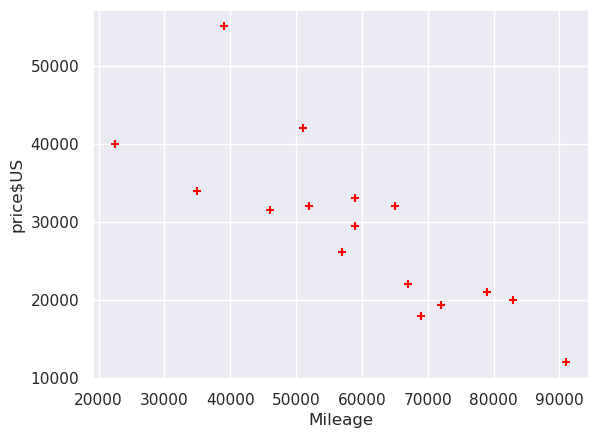

In [152]:
%matplotlib inline
plt.xlabel('Mileage')
plt.ylabel('price$US')
plt.scatter(df.Mileage ,df['Sell Price'],color='red',marker='+')

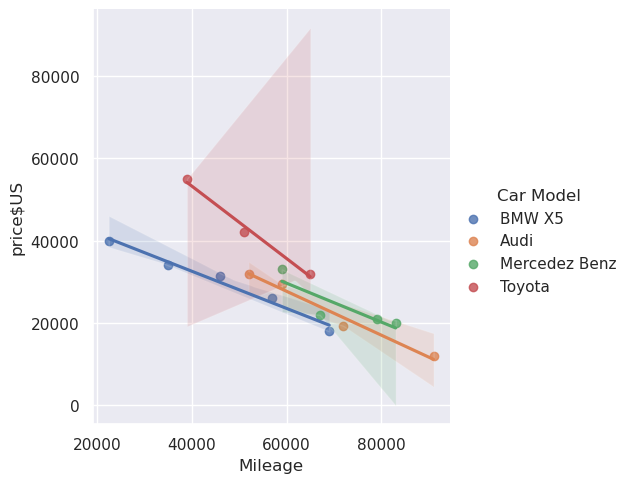

In [153]:
import seaborn as sns
sns.set_theme()
g = sns.lmplot(
    data=df,
    x="Mileage", y="Sell Price", hue="Car Model",
    height=5
g.set_axis_labels("Mileage", "price$US")

In [154]:
dummies = pd.get_dummies(df['Car Model'])
dummies

,Audi,BMW X5,Mercedez Benz,Toyota
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
5,1,0,0,0
6,1,0,0,0
7,1,0,0,0
8,1,0,0,0
9,0,0,1,0


In [155]:
merged = pd.concat([df,dummies],axis = 'columns')
merged

,Car Model,Mileage,Sell Price,Age,Audi,BMW X5,Mercedez Benz,Toyota
0,BMW X5,69000,18000,6,0,1,0,0
1,BMW X5,35000,34000,3,0,1,0,0
2,BMW X5,57000,26100,5,0,1,0,0
3,BMW X5,22500,40000,2,0,1,0,0
4,BMW X5,46000,31500,4,0,1,0,0
5,Audi,59000,29400,5,1,0,0,0
6,Audi,52000,32000,5,1,0,0,0
7,Audi,72000,19300,6,1,0,0,0
8,Audi,91000,12000,8,1,0,0,0
9,Mercedez Benz,67000,22000,6,0,0,1,0


In [156]:
cut = merged.drop(['Car Model'], axis = 'columns')
cut

,Mileage,Sell Price,Age,Audi,BMW X5,Mercedez Benz,Toyota
0,69000,18000,6,0,1,0,0
1,35000,34000,3,0,1,0,0
2,57000,26100,5,0,1,0,0
3,22500,40000,2,0,1,0,0
4,46000,31500,4,0,1,0,0
5,59000,29400,5,1,0,0,0
6,52000,32000,5,1,0,0,0
7,72000,19300,6,1,0,0,0
8,91000,12000,8,1,0,0,0
9,67000,22000,6,0,0,1,0


In [157]:
final = cut.drop(['Toyota'], axis = 'columns')
final

,Mileage,Sell Price,Age,Audi,BMW X5,Mercedez Benz
0,69000,18000,6,0,1,0
1,35000,34000,3,0,1,0
2,57000,26100,5,0,1,0
3,22500,40000,2,0,1,0
4,46000,31500,4,0,1,0
5,59000,29400,5,1,0,0
6,52000,32000,5,1,0,0
7,72000,19300,6,1,0,0
8,91000,12000,8,1,0,0
9,67000,22000,6,0,0,1


In [158]:
merged.corr()

,Mileage,Sell Price,Age,Audi,BMW X5,Mercedez Benz,Toyota
Mileage,1.000000,-0.813217,0.938932,0.306305,-0.507462,0.421042,-0.204287
Sell Price,-0.813217,1.000000,-0.651824,-0.334178,0.046181,-0.288467,0.635920
Age,0.938932,-0.651824,1.000000,0.259489,-0.578488,0.353848,0.006543
Audi,0.306305,-0.334178,0.259489,1.000000,-0.389249,-0.333333,-0.277350
BMW X5,-0.507462,0.046181,-0.578488,-0.389249,1.000000,-0.389249,-0.323875
Mercedez Benz,0.421042,-0.288467,0.353848,-0.333333,-0.389249,1.000000,-0.277350
Toyota,-0.204287,0.635920,0.006543,-0.277350,-0.323875,-0.277350,1.000000


In [159]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [160]:
X = final.drop('Sell Price', axis = 'columns')


In [161]:
y  = final['Sell Price']

In [162]:
from sklearn.model_selection import train_test_split

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1, random_state = 1) 

In [164]:
X_train

,Mileage,Age,Audi,BMW X5,Mercedez Benz
7,72000,6,1,0,0
2,57000,5,0,1,0
6,52000,5,1,0,0
10,83000,7,0,0,1
4,46000,4,0,1,0
1,35000,3,0,1,0
14,65000,7,0,0,0
0,69000,6,0,1,0
15,39000,5,0,0,0
9,67000,6,0,0,1


In [165]:
model.fit(X,y)

LinearRegression()

#### Price of mercedez benz that is 4 yr old with mileage 45000

In [166]:
model.predict([[45000,4,0,0,1]]) # mercedez benz, 4 yearold, 45000 mil

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([38302.52737341])

#### Price of BMW X5 that is 7 yr old with mileage 86000

In [167]:
model.predict([[86000,7,0,1,0]]) # BMW X5, 7 yr, 86000 mil

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([8328.21422242])

In [168]:
model.score(X,y) # accuracy R2

0.9461669991799322

## Training and Testing Data

In [169]:
df = pd.read_csv('/kaggle/input/car-prices-one-hot-encoding-example-data/carprices.csv')
df

,Car Model,Mileage,Sell Price,Age
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi,59000,29400,5
6,Audi,52000,32000,5
7,Audi,72000,19300,6
8,Audi,91000,12000,8
9,Mercedez Benz,67000,22000,6


In [170]:
df = df.drop(['Car Model'], axis = 'columns')
df

,Mileage,Sell Price,Age
0,69000,18000,6
1,35000,34000,3
2,57000,26100,5
3,22500,40000,2
4,46000,31500,4
5,59000,29400,5
6,52000,32000,5
7,72000,19300,6
8,91000,12000,8
9,67000,22000,6


#### Car Mileage Vs Sell Price ($)

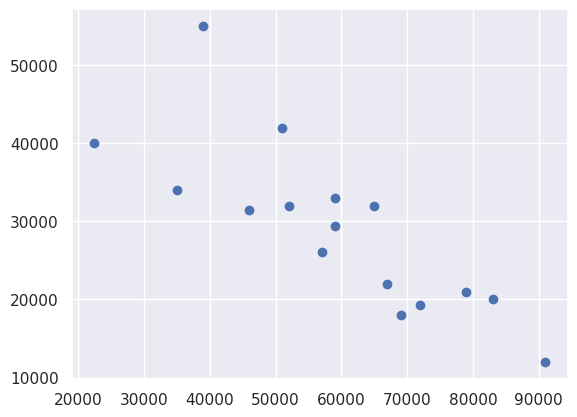

In [171]:
%matplotlib inline
plt.scatter(df['Mileage'],df['Sell Price'])

#### Car Age Vs Sell Price ($)



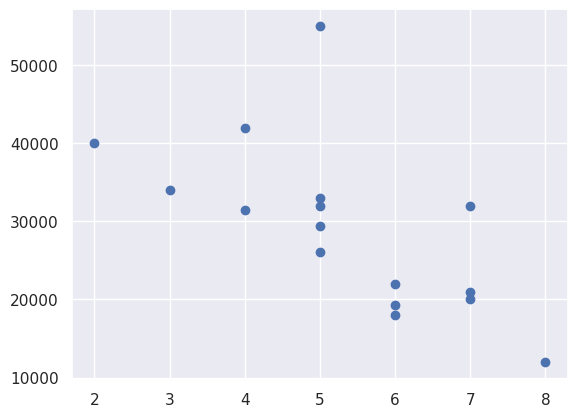

In [172]:
plt.scatter(df['Age'],df['Sell Price'])

In [173]:
X = df[['Mileage','Age']]
y = df['Sell Price']

In [174]:
from sklearn.model_selection import train_test_split

In [175]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 10) 

In [176]:
X_train

,Mileage,Age
6,52000,5
8,91000,8
10,83000,7
2,57000,5
11,79000,7
12,59000,5
15,39000,5
1,35000,3
0,69000,6
4,46000,4


In [177]:
y_train

6     32000
8     12000
10    20000
2     26100
11    21000
12    33000
15    55000
1     34000
0     18000
4     31500
13    42000
9     22000
Name: Sell Price, dtype: int64

In [178]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()

In [179]:
clf.fit(X_train, y_train)

LinearRegression()

In [180]:
clf.predict(X_test)

array([27878.79932989, 46889.24165699, 34842.85537513, 20649.36320889])

In [181]:
y_test

5     29400
3     40000
14    32000
7     19300
Name: Sell Price, dtype: int64

In [182]:
clf.score(X_test, y_test)

0.7271568054289921